In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
%matplotplib inline 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 4627 files belonging to 5 classes.


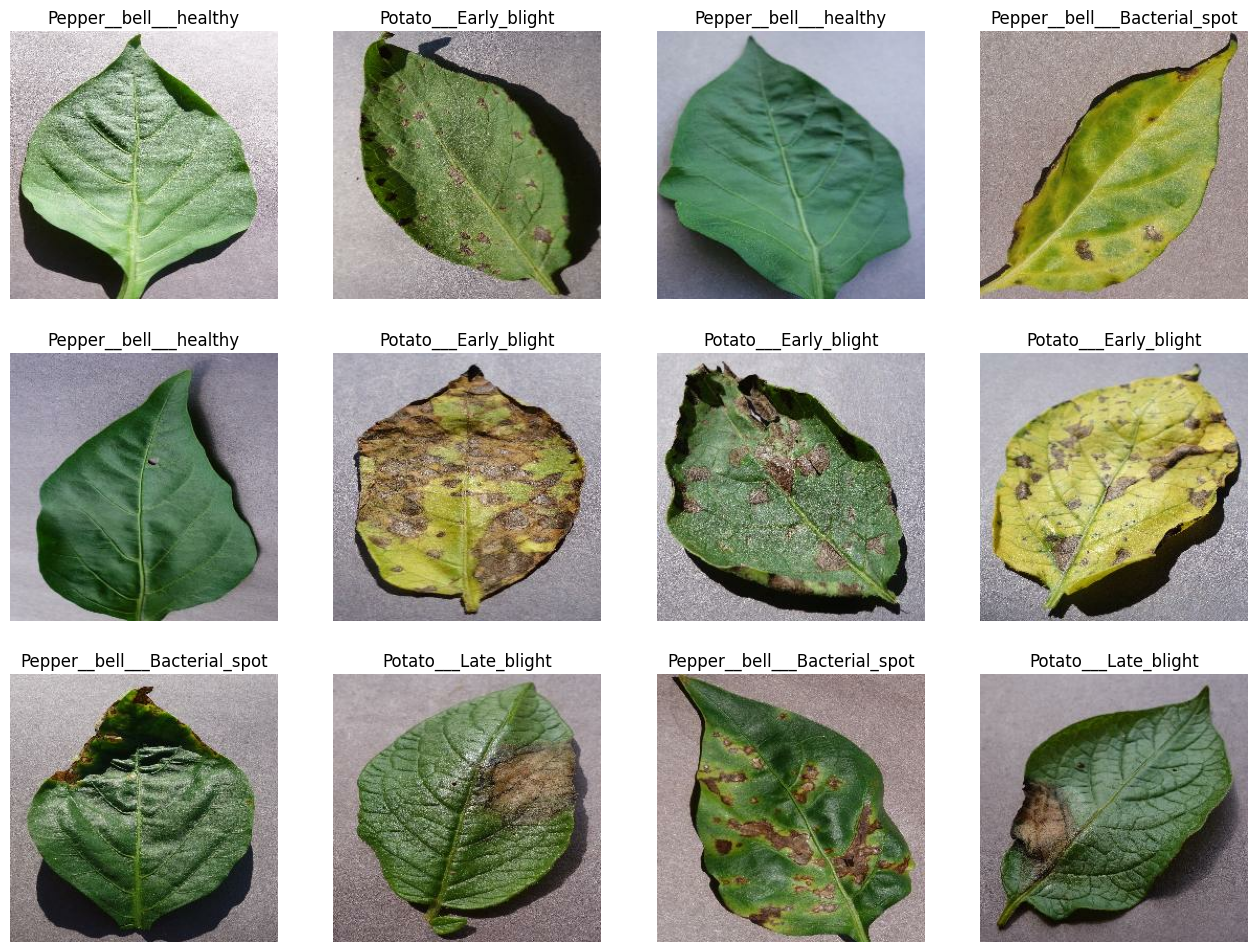

In [9]:
class_names = dataset.class_names
class_names
plt.figure(figsize=(16, 16))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
class_names = dataset.class_names
class_names

In [ ]:
len(dataset)

In [ ]:
for image_batch, lebel_batch in dataset.take(1):
    print(image_batch.shape)
    print(lebel_batch.numpy())

In [ ]:
for image_batch, lebel_batch in dataset.take(1): #this output is in NumPy means in 3D array
    print(image_batch[0].numpy())

In [ ]:
plt.figure(figsize=(12,12))
for image_batch, lebel_batch in dataset.take(1): # as it has shuffle enabled it will show different images every time I load this code
    for i in range(12):
        plt.subplot(3,4,i+1) #shows the photo in 3 rows and 4 column 
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.axis("off") #makes the axis go away
        plt.title(class_names[lebel_batch[i]]) #shows the title of the image

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
import cv2
import numpy as np
import os

# Define the folder paths
input_folder = '/PlantVillage/Pepper__bell___healthy'
output_folder = '/PlantVillage/RM/Pepper__bell___healthy_rm'

# Create the output folder if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Define the parameters for GrabCut
iterations = 5
mode = cv2.GC_INIT_WITH_RECT
method = cv2.GC_INIT_WITH_MASK

# Iterate through all images in the input folder
for filename in os.listdir(input_folder):
    # Load the image
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path)

    # Resize the image to 256x256 pixels
    img = cv2.resize(img, (256, 256))

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Create a mask with an initial guess of the foreground and background
    mask = np.zeros(img.shape[:2], np.uint8)
    rect = (50, 50, 200, 200) # Define the initial rectangle for GrabCut
    cv2.grabCut(img, mask, rect, None, None, iterations, mode)

    # Refine the mask using the GrabCut algorithm
    cv2.grabCut(img, mask, None, None, None, iterations, method)

    # Convert the mask to a binary image
    mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Apply the mask to the grayscale image
    img_masked = img_gray * mask

    # Save the resulting image to the output folder
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, img_masked)

print('Background removal completed!')


In [ ]:
import cv2
import os

# Input and output directories
input_dir = '/PlantVillage/Potato___Late_blight_rm'
output_dir = '/PlantVillage/AutoLevel/Potato___Late_blight_rm_au'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through all images in input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPG') :
        # Read input image and resize
        img = cv2.imread(os.path.join(input_dir, filename))
        img = cv2.resize(img, (256, 256))

        # Apply auto-stretching for contrast enhancement
        x_min = np.min(img)
        x_max = np.max(img)
        L = x_min + 0.5*(np.mean(img)-np.median(img))
        R = x_max - 0.5*(np.mean(img)-np.median(img))
        result = 255*((img - L)/(R - L))
        result = np.clip(result, 0, 255).astype(np.uint8)

        # Save output image to output directory
        cv2.imwrite(os.path.join(output_dir, filename), result)
